# Optimization Techniques on MNIST Dataset
This notebook explores various optimization techniques for training neural networks on the MNIST dataset. The focus will be on different optimization strategies including Adaptive Learning Rates, SGD, Mini-Batch Gradient Descent, and Learning Rate Adjustments. Each section will provide a practical task related to these techniques.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Reshape x_train and x_test
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

## Adaptive Learning Rates

## Implementing a Simple Neural Network from Scratch

### Building the Network
Define the architecture of a simple feedforward neural network with one hidden layer. You will need to manually initialize the weights and biases.

**TODO:** Initialize Parameters
Objective: Create a function to initialize weights and biases for all layers of the network.
Instructions:
- Initialize weights with small random values and biases with zeros.
- Use numpy for creating arrays and operations.

Hint: Use np.random.randn for weights and np.zeros for biases. Scale weights by 0.1.

In [ ]:
def initialize_parameters(input_size, hidden_size, output_size):
    """
    Initialize weights and biases for a simple feedforward neural network.

    Parameters:
    - input_size: Number of input features.
    - hidden_size: Number of neurons in the hidden layer.
    - output_size: Number of output classes.

    Returns:
    - parameters: A dictionary containing weights and biases.
    """
    parameters = {
        'W1': np.random.randn(input_size, hidden_size) * 0.1,
        'b1': np.zeros((1, hidden_size)),
        'W2': np.random.randn(hidden_size, output_size) * 0.1,
        'b2': np.zeros((1, output_size)),
    }
    return parameters


TODO: Define Activation Functions
Objective: Implement commonly used activation functions.
Instructions:
 - Define the ReLU and Sigmoid activation functions.
 - Ensure each function works with numpy arrays and supports both forward and derivative (gradient) computations.


In [ ]:
def relu(x):
    """
    ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying ReLU.
    """
    return np.maximum(0, x)


def relu_derivative(x):
    """
    Derivative of ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of ReLU.
    """
    return (x > 0).astype(float)

def sigmoid(x):
    """
    Sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying sigmoid.
    """
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """
    Derivative of sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of sigmoid.
    """
    sig = sigmoid(x)
    return sig * (1 - sig)

TODO: Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.

In [ ]:
def forward_propagation(X, parameters):
    """
    Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.
    """
    Z1 = np.dot(X, parameters['W1']) + parameters['b1']
    A1 = relu(Z1)
    Z2 = np.dot(A1, parameters['W2']) + parameters['b2']
    A2 = sigmoid(Z2)
    cache = {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}
    return A2, cache

TODO: Implement the loss function. Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.

In [ ]:
def compute_loss(y_true, y_pred):
    """
    Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.
    """
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-8)) / m
    return loss

TODO: Implement backpropagation for the network and Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.

In [ ]:
def backward_propagation(X, y_true, parameters, cache):
    """
    Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.
    """
    m = X.shape[0]
    A1, A2 = cache['A1'], cache['A2']
    Z1, Z2 = cache['Z1'], cache['Z2']

    dZ2 = A2 - y_true
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, parameters['W2'].T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    gradients = {'W1': dW1, 'b1': db1, 'W2': dW2, 'b2': db2}
    return gradients

TODO: Update the parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.

In [ ]:
def update_parameters(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    parameters['W1'] -= learning_rate * gradients['W1']
    parameters['b1'] -= learning_rate * gradients['b1']
    parameters['W2'] -= learning_rate * gradients['W2']
    parameters['b2'] -= learning_rate * gradients['b2']
    return parameters

TODO: Train the model by changing the hidden layer size (such as [32, 64, 128]) and observe the impact on network performance during training.

    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

In [ ]:
# Training Loop
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []
    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters = update_parameters(parameters, gradients, learning_rate)
        loss_history.append(loss)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    return parameters, loss_history

hidden_layer_sizes = [32, 64, 128]
for hidden_size in hidden_layer_sizes:
    print(f"\nTraining with hidden layer size: {hidden_size}")
    parameters, loss_history = train_model(x_train, y_train, hidden_size)


Training with hidden layer size: 32
Epoch 0, Loss: 0.7276
Epoch 10, Loss: 1.2612
Epoch 20, Loss: 1.7215
Epoch 30, Loss: 1.8874
Epoch 40, Loss: 1.9133

Training with hidden layer size: 64
Epoch 0, Loss: 0.6585
Epoch 10, Loss: 1.5540
Epoch 20, Loss: 1.8890
Epoch 30, Loss: 1.9381
Epoch 40, Loss: 1.8956

Training with hidden layer size: 128
Epoch 0, Loss: 0.7889
Epoch 10, Loss: 1.7994
Epoch 20, Loss: 1.8397
Epoch 30, Loss: 1.7469
Epoch 40, Loss: 1.6446


TODO: Implement Adam Optimizer

1. Initialize Parameters: Create variables to store the moment estimates (first and second) for each parameter.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).

2. Update Rules: Implement the update rules based on the gradients, learning rate, and moment estimates.


In [ ]:
def initialize_adam(parameters):
    """
    Initialize the Adam optimizer variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).
    """
    v = {key: np.zeros_like(value) for key, value in parameters.items()}
    s = {key: np.zeros_like(value) for key, value in parameters.items()}
    t = 0
    return v, s, t

def update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Update parameters using the Adam optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: First moment vector.
    - s: Second moment vector.
    - t: Time step.
    - learning_rate: Learning rate for updates.
    - beta1: Exponential decay rate for the first moment estimates.
    - beta2: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated first moment vector.
    - s: Updated second moment vector.
    - t: Updated time step.
    """
    t += 1
    for key in parameters.keys():
        v[key] = beta1 * v[key] + (1 - beta1) * gradients[key]
        s[key] = beta2 * s[key] + (1 - beta2) * (gradients[key] ** 2)

        v_corrected = v[key] / (1 - beta1 ** t)
        s_corrected = s[key] / (1 - beta2 ** t)

        parameters[key] -= learning_rate * v_corrected / (np.sqrt(s_corrected) + epsilon)
    return parameters, v, s, t

TODO: Implement Adam optimizer into the training loop.

In [ ]:
def train_model_with_adam(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001):
    """
    Train the neural network model using Adam optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    v, s, t = initialize_adam(parameters)
    loss_history = []
    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters, v, s, t = update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate)
        loss_history.append(loss)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")
    return parameters, loss_history

for hidden_size in hidden_layer_sizes:
    print(f"\nTraining with hidden layer size: {hidden_size}")
    parameters, loss_history = train_model(x_train, y_train, hidden_size)


Training with hidden layer size: 32
Epoch 0, Loss: 0.8002
Epoch 10, Loss: 1.3409
Epoch 20, Loss: 1.8378
Epoch 30, Loss: 2.0219
Epoch 40, Loss: 2.0617

Training with hidden layer size: 64
Epoch 0, Loss: 0.9844
Epoch 10, Loss: 1.8088
Epoch 20, Loss: 1.9919
Epoch 30, Loss: 1.9796
Epoch 40, Loss: 1.9185

Training with hidden layer size: 128
Epoch 0, Loss: 0.6860
Epoch 10, Loss: 1.8556
Epoch 20, Loss: 1.9307
Epoch 30, Loss: 1.8265
Epoch 40, Loss: 1.7044


### Compare Adam and RMSprop


TODO: First, implement the RMSprop optimizer. The RMSprop optimizer uses a moving average of squared gradients to normalize the gradient, which helps to stabilize the updates.

In [ ]:
def initialize_rmsprop(parameters):
    """
    Initialize the RMSprop variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - s: Second moment vector (initialized to zeros).
    """
    s = {}
    for key in parameters.keys():
        s[key] = np.zeros_like(parameters[key])
    return s

def update_parameters_with_rmsprop(parameters, gradients, s, learning_rate=0.001, beta=0.9, epsilon=1e-8):
    """
    Update parameters using the RMSprop optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - s: Second moment vector.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - s: Updated second moment vector.
    """
    for key in parameters.keys():
        s[key] = beta * s[key] + (1 - beta) * np.square(gradients[key])
        parameters[key] -= learning_rate * gradients[key] / (np.sqrt(s[key]) + epsilon)
    return parameters, s

TODO: Modify the training loop to allow for both optimizers and store the loss history for comparison.

In [ ]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001, optimizer='adam'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('adam' or 'rmsprop').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    parameters = initialize_parameters(X_train.shape[1], hidden_size, y_train.shape[1])
    loss_history = []
    if optimizer == 'adam':
        v, s, t = initialize_adam(parameters)
    elif optimizer == 'rmsprop':
        s = initialize_rmsprop(parameters)
    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        if optimizer == 'adam':
            t += 1
            parameters, v, s,_ = update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate)
        elif optimizer == 'rmsprop':
            parameters, s = update_parameters_with_rmsprop(parameters, gradients, s, learning_rate)
        loss_history.append(loss)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    return parameters, loss_history

TODO:  Compare Both Optimizers. Create a function to train the model using both optimizers and plot the loss histories for comparison.


Training with Adam optimizer...
Epoch 0, Loss: 0.7334
Epoch 10, Loss: 1.8893
Epoch 20, Loss: 2.1367
Epoch 30, Loss: 1.3925
Epoch 40, Loss: 1.1140

Training with Rmsprop optimizer...
Epoch 0, Loss: 0.8399
Epoch 10, Loss: 1.4601
Epoch 20, Loss: 1.1960
Epoch 30, Loss: 1.0485
Epoch 40, Loss: 0.9665


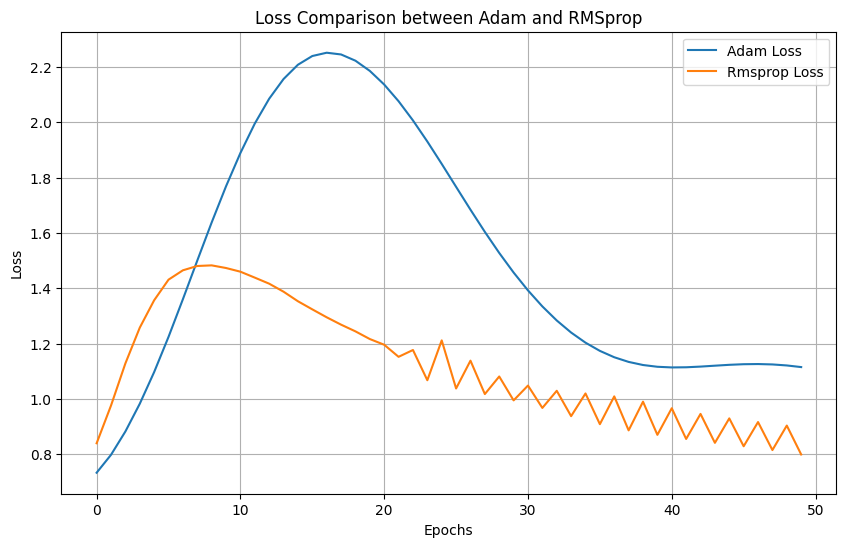

In [ ]:
def compare_optimizers(X_train, y_train, hidden_size=64, epochs=50):
    """
    Compare the Adam and RMSprop optimizers.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    optimizers = ['adam', 'rmsprop']
    histories = {}
    for opt in optimizers:
        print(f"\nTraining with {opt.capitalize()} optimizer...")
        parameters, loss_history = train_model(x_train, y_train, hidden_size, epochs=epochs, optimizer=opt)
        histories[opt] = loss_history
    plt.figure(figsize=(10, 6))
    for opt in optimizers:
        plt.plot(histories[opt], label=f"{opt.capitalize()} Loss")
    plt.title("Loss Comparison between Adam and RMSprop")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

compare_optimizers(x_train, y_train)

## Stochastic Gradient Descent (SGD)

### Impact of Different Learning Rates on SGD


Explore the impact of different learning rates on the training dynamics and performance of Stochastic Gradient Descent (SGD). This will allow us to observe how the learning rate affects convergence speed, stability, and final performance.

Steps for Implementing the Experiment

1. Define the SGD Optimizer: Implement a simple SGD optimizer.
2. Modify the Training Loop: Allow for different learning rates.
3. Train the Model: Run the training process with a set of predefined learning rates.
4. Visualize the Results: Plot the loss curves for each learning rate to compare their effects

1. Implement SGD Optimizer


In [ ]:
def update_parameters_with_sgd(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using Stochastic Gradient Descent (SGD).

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    parameters['W1'] -= learning_rate * gradients['W1']
    parameters['b1'] -= learning_rate * gradients['b1']
    parameters['W2'] -= learning_rate * gradients['W2']
    parameters['b2'] -= learning_rate * gradients['b2']
    return parameters

2. Modify the Training Loop


In [ ]:
def train_model_with_sgd(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using SGD optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    """
    parameters = initialize_parameters(X_train.shape[1], hidden_size, y_train.shape[1])
    loss_history = []
    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)
        loss_history.append(loss)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss (learning rate {learning_rate}): {loss:.4f}")
    return parameters, loss_history

3. Experiment with Different Learning Rates



Training with learning rate: 0.001
Epoch 0, Loss (learning rate 0.001): 0.7973
Epoch 10, Loss (learning rate 0.001): 0.9562
Epoch 20, Loss (learning rate 0.001): 1.0982
Epoch 30, Loss (learning rate 0.001): 1.2224
Epoch 40, Loss (learning rate 0.001): 1.3297

Training with learning rate: 0.01
Epoch 0, Loss (learning rate 0.01): 0.6257
Epoch 10, Loss (learning rate 0.01): 1.6389
Epoch 20, Loss (learning rate 0.01): 1.7833
Epoch 30, Loss (learning rate 0.01): 1.7314
Epoch 40, Loss (learning rate 0.01): 1.6443

Training with learning rate: 0.1
Epoch 0, Loss (learning rate 0.1): 0.9509
Epoch 10, Loss (learning rate 0.1): 1.3869
Epoch 20, Loss (learning rate 0.1): 1.0647
Epoch 30, Loss (learning rate 0.1): 0.9352
Epoch 40, Loss (learning rate 0.1): 0.8636


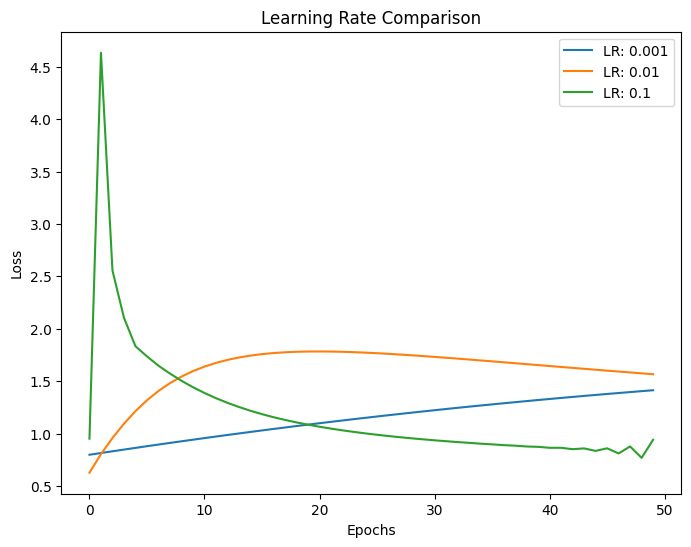

In [ ]:
def compare_learning_rates(X_train, y_train, hidden_size, epochs=50, learning_rates=[0.001, 0.01, 0.1]):
    """
    Compare the performance of SGD with different learning rates.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rates: List of learning rates to test.
    """
    histories = {}
    for lr in learning_rates:
        print(f"\nTraining with learning rate: {lr}")
        _, loss_history = train_model_with_sgd(X_train, y_train, hidden_size, epochs, learning_rate=lr)
        histories[lr] = loss_history
    plt.figure(figsize=(8, 6))
    for lr in learning_rates:
        plt.plot(histories[lr], label=f"LR: {lr}")
    plt.title('Learning Rate Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

compare_learning_rates(x_train, y_train, 128)

### SGD with Momentum vs. Classic SGD


TODO: Compare Stochastic Gradient Descent (SGD) with momentum and classic SGD, you can set up an experiment that trains the same model using both methods. This will help you observe differences in convergence speed and stability.

Steps for Implementing the Comparison:

1. Implement Classic SGD: Ensure you have a basic SGD implementation.(already implemented in the previous cells)

2. Implement SGD with Momentum: Add a momentum version of the SGD optimizer.

3. Modify the Training Loop: Allow for both optimizers in the training process.

4. Train the Model: Run the training process using both optimizers.

5. Visualize the Results: Plot the loss curves for each optimizer to compare their performance.

2. Implement SGD with Momentum


In [ ]:
def initialize_momentum(parameters):
    """
    Initialize the momentum variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: Momentum variable (initialized to zeros).
    """
    v = {}
    for key in parameters.keys():
        v[key] = np.zeros_like(parameters)
    return v

def update_parameters_with_momentum(parameters, gradients, v, learning_rate=0.01, beta=0.9):
    """
    Update parameters using SGD with momentum.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: Momentum variable.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for momentum.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated momentum variable.
    """
    for key in parameters:
        v[key] = beta * v[key] + (1 - beta) * gradients[key]
        parameters[key] -= learning_rate * v[key]
    return parameters, v

3. Modify the Training Loop


In [ ]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, optimizer='Classic SGD'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('sgd' or 'momentum').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    parameters = initialize_parameters(X_train.shape[1], hidden_size, y_train.shape[1])
    v = initialize_momentum(parameters)
    loss_history = []
    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        if optimizer =='Classic SGD':
            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)
        elif optimizer == 'Momentum':
            parameters, v = update_parameters_with_momentum(parameters, gradients, v, learning_rate)
        loss_history.append(loss)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss ({optimizer}): {loss:.4f}")
    return loss_history

4. Train the Model with Both Optimizers



Training with Classic sgd ...
Epoch 0, Loss (Classic SGD): 0.6256
Epoch 10, Loss (Classic SGD): 1.3375
Epoch 20, Loss (Classic SGD): 1.7542
Epoch 30, Loss (Classic SGD): 1.8536
Epoch 40, Loss (Classic SGD): 1.8373

Training with Momentum ...
Epoch 0, Loss (Momentum): 0.6963
Epoch 10, Loss (Momentum): 1.2147
Epoch 20, Loss (Momentum): 2.0849
Epoch 30, Loss (Momentum): 2.5076
Epoch 40, Loss (Momentum): 2.3708


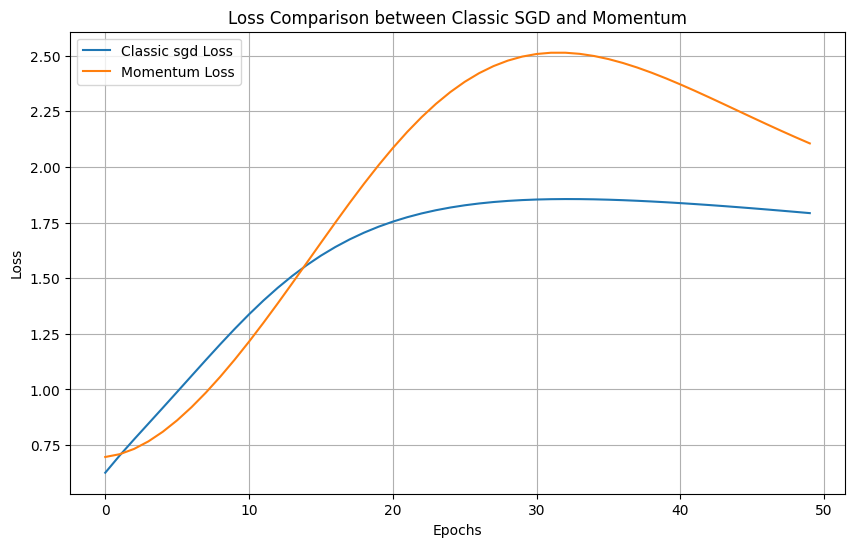

In [ ]:
def compare_sgd_and_momentum(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the performance of classic SGD and SGD with momentum.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    optimizers = ['Classic SGD', 'Momentum']
    histories = {}
    for opt in optimizers:
        print(f"\nTraining with {opt.capitalize()} ...")
        loss_history = train_model(x_train, y_train, hidden_size, epochs=epochs, optimizer=opt)
        histories[opt] = loss_history
    plt.figure(figsize=(10, 6))
    for opt in optimizers:
        plt.plot(histories[opt], label=f"{opt.capitalize()} Loss")
    plt.title("Loss Comparison between Classic SGD and Momentum")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

compare_sgd_and_momentum(x_train, y_train, 64)

## Mini-Batch Gradient Descent

### Mini-Batch Size Optimization

TODO: Investigate how different mini-batch sizes affect model performance, you can set up an experiment where you train the same model using various mini-batch sizes.

Steps for Implementing the Mini-Batch Size Experiment

1. Modify the Training Loop: Update the training loop to use mini-batches.
2. Train the Model: Run the training process with a set of predefined mini-batch sizes.
3. Evaluate Performance: Track training time and accuracy for each mini-batch size.
4. Print the training losses and accuracies for comparison.

1. Modify the Training Loop for Mini-Batches


In [ ]:
def train_model_with_mini_batches(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, batch_size=32):
    """
    Train the neural network model using mini-batches.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - batch_size: Size of mini-batches.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    parameters = initialize_parameters(X_train.shape[1], hidden_size, y_train.shape[1])
    loss_history = []
    accuracy_history = []
    num_batches = X_train.shape[0]
    for epoch in range(epochs):
        epoch_loss = 0
        for i in range(num_batches):
            batch_X = X_train[i:i+batch_size]
            batch_y = y_train[i:i+batch_size]
            A2, cache = forward_propagation(batch_X, parameters)
            loss = compute_loss(batch_y, A2)
            gradients = backward_propagation(batch_X, batch_y, parameters, cache)
            parameters = update_parameters(parameters, gradients, learning_rate)
            epoch_loss += loss
        loss_history.append(epoch_loss / (num_batches // batch_size))
        A2_full, _ = forward_propagation(X_train, parameters)
        predictions = np.argmax(A2_full, axis=1)
        labels = np.argmax(y_train, axis=1)
        accuracy = np.mean(predictions == labels)
        accuracy_history.append(accuracy)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {epoch_loss / (num_batches // batch_size):.4f}, Accuracy: {accuracy:.4f}")
    return parameters, loss_history

2. Train the Model with Different Mini-Batch Sizes


In [143]:
def compare_mini_batch_sizes(X_train, y_train, hidden_size, epochs=50, batch_sizes=[16, 32, 64]):
    """
    Compare the performance of different mini-batch sizes and print results.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_sizes: List of mini-batch sizes to test.
    """
    results = {}
    for batch_size in batch_sizes:
        print(f"\nTraining with batch size: {batch_size}")
        l, a = train_model_with_mini_batches(X_train, y_train, hidden_size, epochs, learning_rate=0.01, batch_size=batch_size)
        print(f"Final Loss (batch size {batch_size}): {l[-1]:.4f}")
        print(f"Final Accuracy (batch size {batch_size}): {a[-1]:.4f}")

compare_mini_batch_sizes(x_train, y_train, hidden_size=64, epochs=50, batch_sizes=[16, 32, 64])

Training with mini-batch size: 16
Epoch 0, Loss: 0.7233, Accuracy: 0.6875
Epoch 10, Loss: 0.4548, Accuracy: 0.8750
Epoch 20, Loss: 0.2091, Accuracy: 0.8750
Epoch 30, Loss: 0.2622, Accuracy: 0.9375
Epoch 40, Loss: 0.3242, Accuracy: 0.9375
Final Loss for batch size 16: 0.3031
Final Accuracy for batch size 16: 0.8750

Training with mini-batch size: 32
Epoch 0, Loss: 0.6352, Accuracy: 0.7188
Epoch 10, Loss: 0.6252, Accuracy: 0.7500
Epoch 20, Loss: 0.3829, Accuracy: 0.8750
Epoch 30, Loss: 0.3514, Accuracy: 0.9062
Epoch 40, Loss: 0.2668, Accuracy: 0.9062
Final Loss for batch size 32: 0.2293
Final Accuracy for batch size 32: 0.9375

Training with mini-batch size: 64
Epoch 0, Loss: 0.7203, Accuracy: 0.6250
Epoch 10, Loss: 0.6136, Accuracy: 0.7500
Epoch 20, Loss: 0.4563, Accuracy: 0.8750
Epoch 30, Loss: 0.3877, Accuracy: 0.8750
Epoch 40, Loss: 0.2832, Accuracy: 0.8750
Final Loss for batch size 64: 0.2443
Final Accuracy for batch size 64: 0.8750


### Mini-Batch vs. Full-Batch Gradient Descent


TODO: Compare the efficiency and performance of mini-batch gradient descent against full-batch gradient descent.

1. Implement Full-Batch Gradient Descent: Ensure you have a full-batch gradient descent implementation.

2. Modify the Training Loop: Allow the training loop to handle both mini-batch and full-batch scenarios.

3. Train the Model: Run the training process using both methods and track their performance.

4. Print Results: Display the final loss and accuracy for both methods along with training times.

In [ ]:
def train_model_full_batch(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    parameters = initialize_parameters(X_train.shape[1], hidden_size, y_train.shape[1])
    loss_history = []
    accuracy_history = []
    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        loss_history.append(loss)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters = update_parameters(parameters, gradients, learning_rate)
        A2_full, _ = forward_propagation(X_train, parameters)
        predictions = np.argmax(A2_full, axis=1)
        labels = np.argmax(y_train, axis=1)
        accuracy = np.mean(predictions == labels)

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

    return loss_history, accuracy_history

In [144]:
import time

def compare_mini_batch_and_full_batch(X_train, y_train, hidden_size, epochs=50, batch_size=32):
    """
    Compare the performance of mini-batch gradient descent against full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_size: Size of mini-batches for mini-batch gradient descent.
    """

    results = {}

    print("\nTraining with Full-Batch Gradient Descent...")
    start_time = time.time()
    loss_full, acc_full = train_model_full_batch(X_train, y_train, hidden_size, epochs, learning_rate=0.01)
    full_time = time.time() - start_time
    results["full_batch"] = {"loss": loss_full, "accuracy": acc_full, "time": full_time}

    print("\nTraining with Mini-Batch Gradient Descent...")
    start_time = time.time()
    loss_mini, acc_mini = train_model_with_mini_batches(X_train, y_train, hidden_size, epochs, learning_rate=0.01, batch_size=batch_size)
    mini_time = time.time() - start_time
    results["mini_batch"] = {"loss": loss_mini, "accuracy": acc_mini, "time": mini_time}

    print("\nResults:")
    print(f"Mini-Batch: Final Loss = {loss_mini[-1]:.4f}, Final Accuracy = {acc_mini[-1]:.4f}, Training Time = {mini_time:.2f} seconds")
    print(f"Full-Batch: Final Loss = {loss_full[-1]:.4f}, Final Accuracy = {acc_full[-1]:.4f}, Training Time = {full_time:.2f} seconds")

compare_mini_batch_and_full_batch(x_train, y_train, hidden_size=64, epochs=50, batch_size=32)

Training with Full-Batch Gradient Descent...
Epoch 10/50, Loss: 1.6032, Accuracy: 0.1652
Epoch 20/50, Loss: 1.8836, Accuracy: 0.2217
Epoch 30/50, Loss: 1.9093, Accuracy: 0.2908
Epoch 40/50, Loss: 1.8657, Accuracy: 0.3539
Epoch 50/50, Loss: 1.8045, Accuracy: 0.4053

Training with Mini-Batch Gradient Descent...
Epoch 10/50, Loss: 0.4159, Accuracy: 0.8637
Epoch 20/50, Loss: 0.3607, Accuracy: 0.8791
Epoch 30/50, Loss: 0.3297, Accuracy: 0.8899
Epoch 40/50, Loss: 0.3080, Accuracy: 0.8982
Epoch 50/50, Loss: 0.2903, Accuracy: 0.8982

Results:
Mini-Batch: Final Loss = 0.2903, Final Accuracy = 0.8982, Training Time = 106.07 seconds
Full-Batch: Final Loss = 1.8045, Final Accuracy = 0.4053, Training Time = 34.75 seconds
